## 1. Random QA

### 1.1
What is the probability $p_k$,n that our random QA system will output an answer with k tokens when given a context paragraph with n token as input?

$$p_{k,n} = \frac{n-k+1}{n(n+1)}$$

### 1.2
For a ﬁxed n of 100, produce a plot of $p_k$,$n$ and $\hat{p_k}$,$n$ vs $k$. Design a monte-carlo experiment to estimate the values for $\hat{p_k}$,$n$ .

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import datetime
import pickle
import warnings
warnings.filterwarnings('ignore')
plt.style.use('classic')
%matplotlib inline
import seaborn as sns
sns.set()
plt.rcParams['figure.figsize'] = (8.0, 5.0)

In [2]:
def compute_p_given_n_k(n,k):
    return 2*(n-k+1)/(n*(n+1))

In [3]:
def mc_p_given_n_k(n, k, exp = 10e5):
    '''
    num_occurance = n - k + 1
    q = num_occurance
    s: position of length =k in num_total set 
    (1+q)*q / 2 = s  -- s: the position of where length = k should be in num_total 
    q = (-1 +/- sqrt(8s + 1))/2
    q = n - k +1
    k = n - q + 1
    k = n - (-1 + sqrt(8s + 1))/2 + 1
    k = n - sqrt(8s+1)/2 + 3/2
    '''
    count = 0
    num_total = n * (n+1)/2
    for i in range(int(exp)):
        s = np.random.randint(1, num_total+1)
        length = np.floor(n - (1/2) * (np.sqrt(8*s +1) ) + 3/2)
        if length == k:
            count += 1
    return count/exp

Text(0.5, 1.0, 'probability of QA system output k tokens given context n')

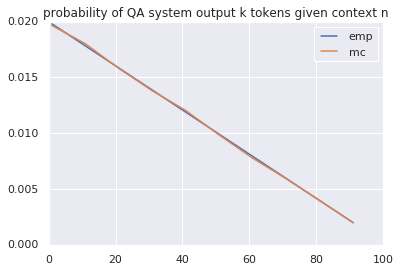

In [4]:
x = np.arange(1,101,10)
prob = [compute_p_given_n_k(100, i) for i in x]
mc_prob = [mc_p_given_n_k(100, i) for i in x]
plt.plot(x, prob, label = 'emp')
plt.plot(x, mc_prob, label = 'mc')
plt.legend()
plt.title('probability of QA system output k tokens given context n')

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def p_k_n(k, n):
    #implement answer from part 1 here
    p_k_n = 0.5
    return p_k_n

In [3]:
def monte_carlo_p_k_n(k, n, T = int(1e5)):
    #T is the number of times you run experiment
    p_k_n_hat = 1
    return p_k_n_hat

In [4]:
k_array = np.arange(1, 100, 5)
p_k_n_hat = [monte_carlo_p_k_n(k, n=100, T = int(1e5)) for k in k_array]
p_k_n = [p_k_n(k, n=100) for k in k_array]

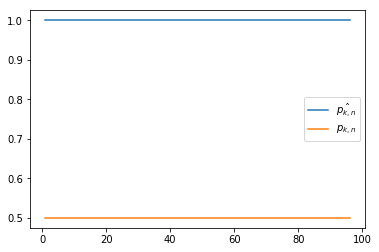

In [5]:
plt.plot(k_array, p_k_n_hat, label = r'$\hat{p_{k,n}}$')
plt.plot(k_array, p_k_n, label = r'$p_{k, n}$')
plt.legend()

### 1.3
Calculate the expected length of the answer given by your random QA system. i,e write an expression for $L_n = E[K]$ (It's fine to leave it as a summation).

$$ L_n = \frac{1}{n^2} \sum_1^n \sum_1^{e-1} (e - s + 1) + \frac{1}{n^2} \sum_1^n \sum_e^n (s - e + 1)$$

### 1.4
Plot $\hat{L_n}$ estimated through monte-carlo simulations and $L_n$ for $n = 5, 10, 25, 50, 100, 250$ and $500$.

In [33]:
def L_n(n):
    #implement answer from above
    # Idea is s(start) and e(end) all come from a discrete uniform 
    # distribution has pmf 1/n, and we want to calculate |s - e + 1|
    # So we have \sum_1^n \sum_1^e (e - s + 1) 1 / n**2 
    # + \sum_1^n \sum_e^n (s - e + 1) 1 / n**2
    first_term = 0
    for e in range(1, n + 1):
        for s in range(1, e):
            first_term += e - s + 1
    second_term = 0
    for e in range(1, n + 1):
        for s in range(e, n + 1):
            first_term += s - e + 1
    l_n = (first_term + second_term) / n ** 2
    
    return l_n

def monte_carlo_L_n(n, T = int(1e5)):
    #T is the number of times you run experiment
    length_list = []
    for i in range(T):
        while True:
            start_loc = np.random.randint(1, n+1)
            end_loc = np.random.randint(1, n+1)
            if start_loc <= end_loc:
                length_list.append(end_loc - start_loc + 1)
                break
    return length_list

In [34]:
n_array = [5, 10, 25, 50, 100, 250, 500]
l_n_hat = [np.mean(monte_carlo_L_n(n, T = int(1e5))) for n in n_array]
l_n = [L_n( n) for n in n_array]

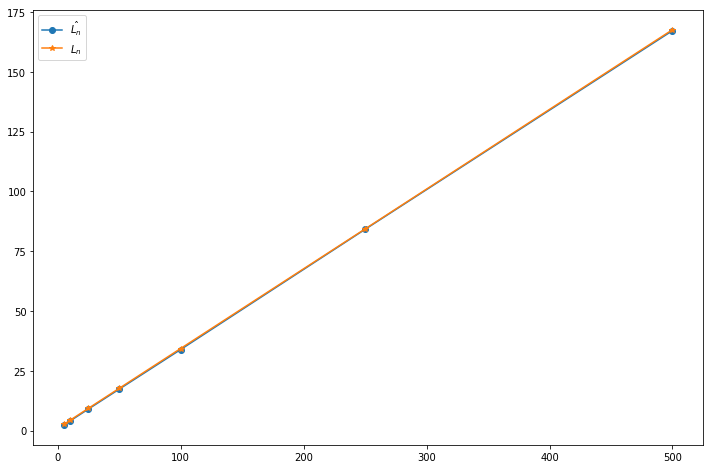

In [37]:
fig = plt.figure(figsize = (12, 8))
plt.plot(n_array, l_n_hat, '-o', label = r'$\hat{L_n}$')
plt.plot(n_array, l_n,  '-*', label = r'$L_n$')
plt.legend()
plt.show()

In [2]:
! git clone https://github.com/williamFalcon/squad.git

Cloning into 'squad'...
remote: Enumerating objects: 47, done.
remote: Total 47 (delta 0), reused 0 (delta 0), pack-reused 47
Unpacking objects: 100% (47/47), done.


In [3]:
! cd squad/ && git pull

Already up to date.


In [4]:
! pip install ujson
! pip install tensorboardX

     |████████████████████████████████| 194kB 4.8MB/s eta 0:00:01
  Created wheel for ujson: filename=ujson-1.35-cp36-cp36m-linux_x86_64.whl size=68037 sha256=010a67d8e753da2ae84e424c417692f5334a90f77ff88a722668355b5c3cc19a
  Stored in directory: /root/.cache/pip/wheels/28/77/e4/0311145b9c2e2f01470e744855131f9e34d6919687550f87d1
Successfully built ujson
     |████████████████████████████████| 194kB 4.9MB/s 


In [5]:
! cd squad/ && python setup.py

glove.840B.300d.zip: 2.18GB [16:55, 2.14MB/s]                
Unzipping GloVe word vectors...
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.6/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.6/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')
Pre-processing train examples...
100% 442/442 [01:32<00:00,  1.82it/s]
130319 questions in total
Pre-processing word vectors...
2196018it [03:03, 11964.64it/s]                 
88744 / 107454 tokens have corresponding word embedding vector
Pre-processing char vectors...
1374 tokens have corresponding char embedding vector
Pre-processing dev examples...
100% 16/16 [00:04<00:00,  3.82it/s]
6078 questions in total
Converting train examples to indices...
130319it [00:42, 3079.60it/s]
tcmalloc: large alloc 3326009344 bytes == 0x138fb2000 @  0x7f5f8c7321e7 0x7f5f8a211f71 0x7f5f8a27555d 0x7f5f8a278e28 0x7f5f8a2793e5 0x7f5f8a30

In [ ]:
import numpy.random as random
import numpy as np
seed = 224
random.seed(seed)
import torch
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)

In [ ]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import numpy as np
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.optim.lr_scheduler as sched
import torch.utils.data as data

from squad.util import collate_fn, SQuAD
from collections import OrderedDict
from json import dumps
from tqdm import tqdm
from ujson import load as json_load

from squad import layers, util
import os

### 1.5 
Calculate the probability, $p_n$ that Random QA system outputs the correct answer to your question(Assume that there only one occurence of your answer string in the context paragraph).

$$p_n = \frac{2}{(n*(n+1))}$$

### 1.6
In SQuAD 2.0 data set, the answer for your question can either lie within the context paragraph or there could be no answer within the given paragraph. Let α represent the fraction of questions for which the answer does not lie within the paragraph.

(1) Estimate $\hat{\alpha}$ from the dataset.

In [ ]:
train_path = os.path.join(DIR, 'squad/data/train.npz')
train_loader = data.DataLoader(SQuAD(train_path),
                               batch_size=64,
                               shuffle=True,
                               drop_last=True,
                               collate_fn=collate_fn)
dev_path = os.path.join(DIR, 'squad/data/dev.npz')
dev_loader = data.DataLoader(SQuAD(dev_path),
                               batch_size=64,
                               shuffle=True,
                               drop_last=True,
                               collate_fn=collate_fn)
test_path = os.path.join(DIR, 'squad/data/test.npz')
test_loader = data.DataLoader(SQuAD(test_path),
                               batch_size=64,
                               shuffle=True,
                               drop_last=True,
                               collate_fn=collate_fn)

In [ ]:
def estimate_alpha(data_loader):
    no_answer = 0
    total = 0
    for batch in data_loader:
        cw_idxs, cc_idxs, qw_idxs, qc_idxs, y1, y2, ids = batch
        no_answer += sum(y1 == 0).item()
        total += y1.size(-1)    
        return no_answer/total

In [ ]:
print("alpha: ",estimate_alpha(train_loader))

alpha:  0.33364378078817736


In [ ]:

## implement random QA model
## load dataset 
## find F1 and EM on Dev Set

dev_dataset = SQuAD(dev_path)

f1_list = []
em_list = []

for i in range(100):
  f1 = 0.0
  em = 0.0
  for cw_idxs, cc_idxs, qw_idxs, qc_idxs, y1, y2, ids in dev_dataset:
    real_len = sum(cw_idxs != 0).item()
    test = np.random.rand()
    if test <= alpha:
      if y1.item() == 0:
        f1 += 1
        em += 1
    else:
      if y1.item() != 0 and y2.item() != 0:
        while True:
          start_idx = np.random.randint(0,real_len)
          end_idx = np.random.randint(0,real_len)
          if end_idx >= start_idx:
            preds_ids = cw_idxs[start_idx:end_idx+1].tolist()
            preds = " ".join([str(id) for id in preds_ids])
            answer_ids = cw_idxs[y1.item():y2.item()+1].tolist()
            answer = " ".join([str(id) for id in answer_ids])
            f1 += util.compute_f1(answer,preds)
            em += util.compute_em(answer,preds)
            break

  f1_score = f1/len(dev_dataset)
  em_score = em/len(dev_dataset)  
  f1_list.append(f1_score)
  em_list.append(em_score)

In [ ]:
print("mean F1: ",np.mean(f1_list))
print("F1 std: ", np.std(f1_list))
print("mean EM: ",np.mean(em_list))
print("EN std: ", np.std(em_list))

mean F1:  0.1941990820614662
F1 std:  0.0043236481269492725
mean EM:  0.1739539573180978
EN std:  0.004376310750118215
